In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns


import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [52]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [53]:
import os

# List all files in the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/zomato/zomato.csv


In [54]:
data = pd.read_csv('/kaggle/input/zomato/zomato.csv')


In [55]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [56]:
print('Number of rows and columns',data.shape)

Number of rows and columns (51717, 17)


In [57]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [58]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [59]:
data.shape

(51717, 17)

In [60]:
data.duplicated().sum()

0

In [61]:
data.drop_duplicates(inplace=True)

In [62]:
data.duplicated().sum()

0

In [63]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [64]:
data.dropna(how='any',inplace=True)

In [65]:
data.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [66]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [67]:
data=data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

In [68]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [69]:
data['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [70]:
data['cost'].unique()
data['cost']=data['cost'].apply(lambda x:x.replace(',',''))

In [71]:
data['cost'].astype('float')

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51705    1200.0
51707    2000.0
51708    1200.0
51711     800.0
51715    2500.0
Name: cost, Length: 23193, dtype: float64

In [72]:
data['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1200', '150', '350', '250', '1500', '1300',
       '1000', '100', '900', '1100', '1600', '950', '230', '1700', '1400',
       '1350', '2200', '2000', '1800', '1900', '180', '330', '2500',
       '2100', '3000', '2800', '3400', '40', '1250', '3500', '4000',
       '2400', '1450', '3200', '6000', '1050', '4100', '2300', '120',
       '2600', '5000', '3700', '1650', '2700', '4500'], dtype=object)

In [73]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [74]:
data=data.loc[data.rate !='NEW']


In [75]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [76]:
data['rate']=data['rate'].apply(lambda x:x.replace('/5',''))

In [77]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

#   Most Famous Restaurants in Bangalore

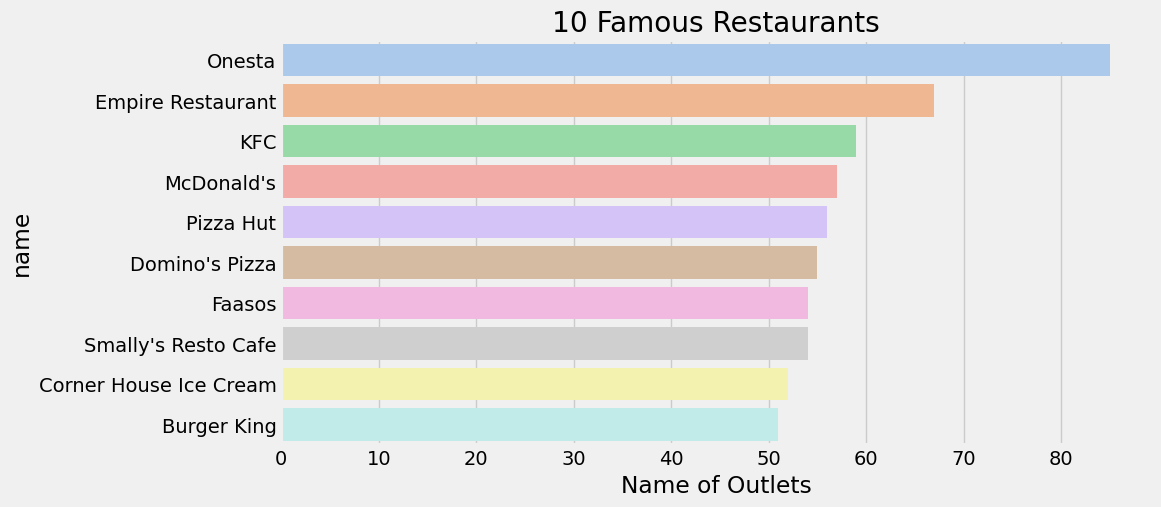

In [78]:
plt.figure(figsize=(10,5))
fam=data['name'].value_counts()[:10]
sns.barplot(x=fam,y=fam.index,palette='pastel')
plt.title("10 Famous Restaurants")
plt.xlabel('Name of Outlets')
plt.show()

# Whether restaurants offer table boooking or not 

In [79]:
x = data['book_table'].value_counts()
colors = ['#800080', '#0000A0']

trace = go.Pie(labels=x.index, values=x, textinfo='value',
               marker=dict(colors=colors, line=dict(color='#001000', width=2)))

layout = go.Layout(title='Table Booking', width=600, height=500)
fig = go.Figure(data=[trace], layout=layout)

# Use iplot to display the plot in a Jupyter notebook
py.iplot(fig, filename='pie_chart_subplots')

# Whether the restaurants offer online booking or not

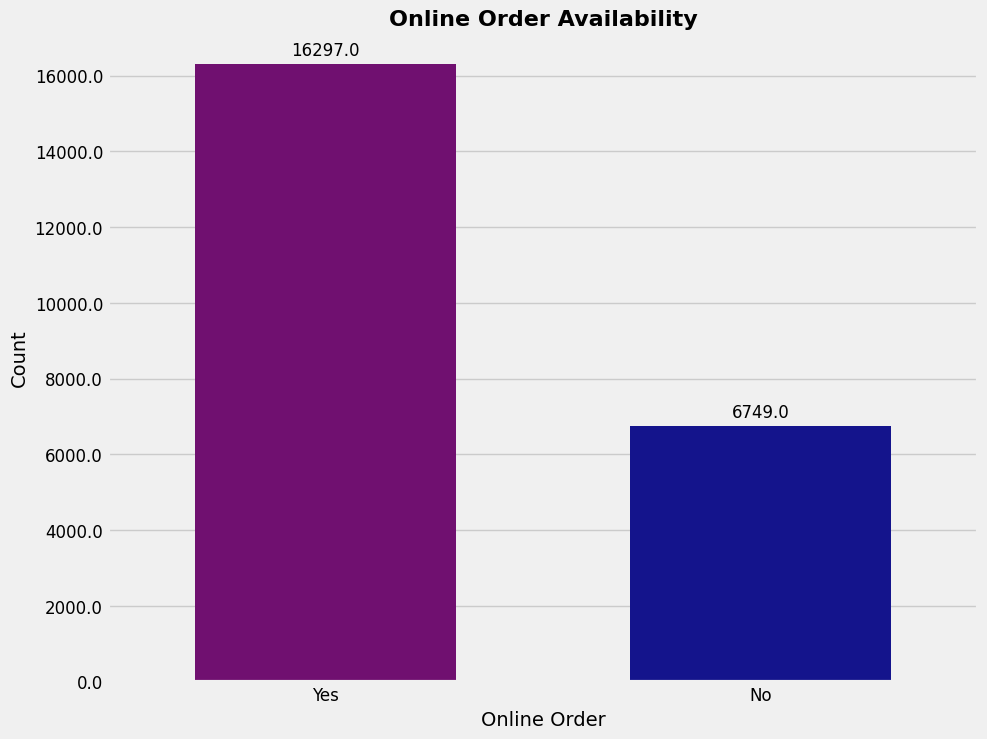

In [80]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='online_order', data=data, palette=['#800080', '#0000A0'], width=0.6)

# Add data labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black')

# Customize the axis ticks
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)

# Adding grid lines
ax.yaxis.grid(True)
ax.set_axisbelow(True)

# Customize the title and labels
plt.title('Online Order Availability', fontsize=16, fontweight='bold')
plt.xlabel('Online Order', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

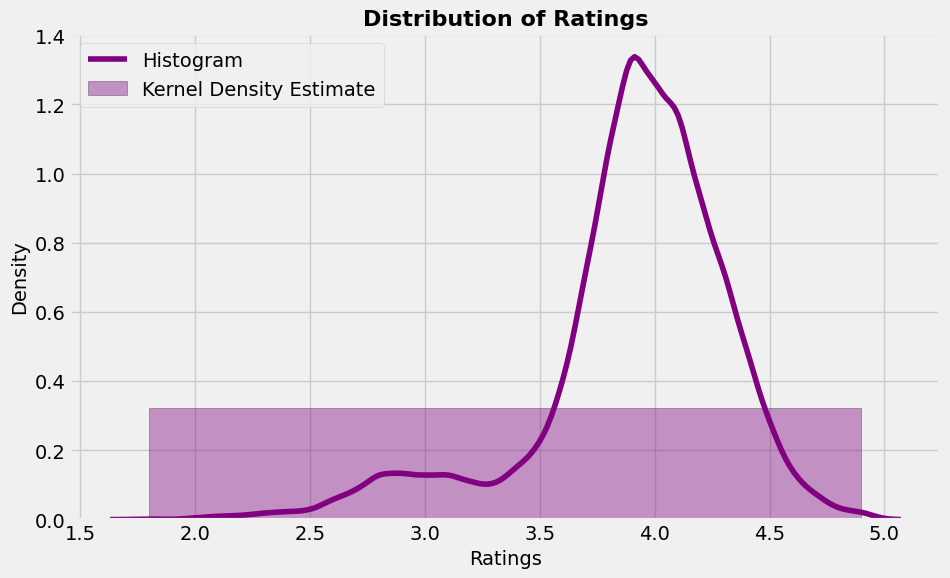

In [81]:
plt.figure(figsize=(10, 6))
sns.distplot(data['rate'], bins=1, hist=True, kde=True, color='purple', hist_kws={'edgecolor': 'black'})

# Customize the title and labels
plt.title('Distribution of Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add legend
plt.legend(['Histogram', 'Kernel Density Estimate'])

# Show the

In [82]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [83]:
data['rate'].min()

'1.8'

In [84]:
data['rate'].max()

'4.9 '

In [85]:
data['rate'].astype(float)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51705    3.8
51707    3.9
51708    2.8
51711    2.5
51715    4.3
Name: rate, Length: 23046, dtype: float64

In [86]:
data['rate'] = pd.to_numeric(data['rate'], errors='coerce')

# Now you can perform comparison operations
count = ((data['rate'] >= 1) & (data['rate'] < 2)).sum()

In [87]:
count

5

In [88]:
((data['rate']>=2)&(data['rate']<3)).sum()

1169

In [89]:
((data['rate']>=3)&(data['rate']<4)).sum()

10123

In [90]:
((data['rate']>=4)).sum()

11749

# Plotting the count with the help of pie chart

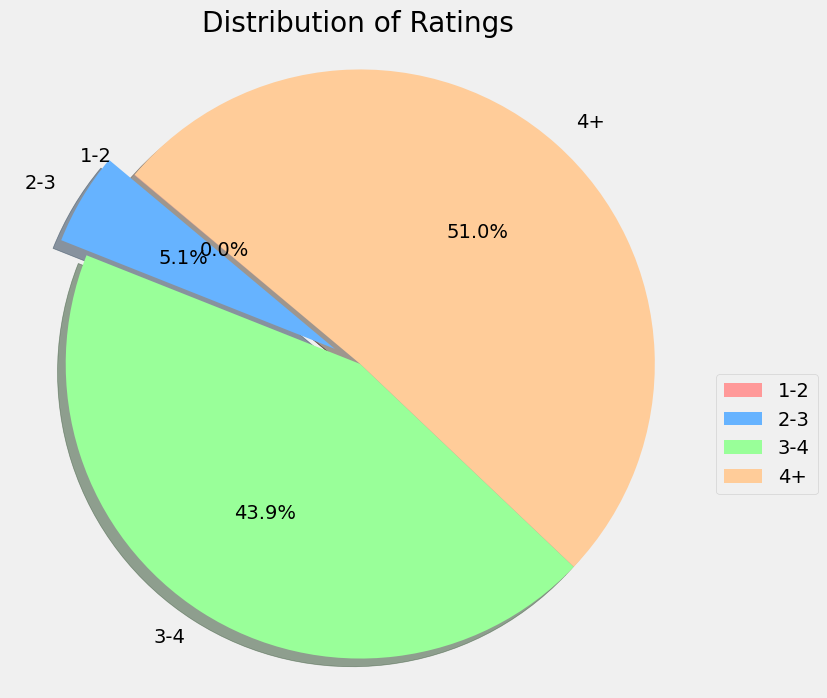

In [91]:
slices = [((data['rate'] >= 1) & (data['rate'] < 2)).sum(),
          ((data['rate'] >= 2) & (data['rate'] < 3)).sum(),
          ((data['rate'] >= 3) & (data['rate'] < 4)).sum(),
          ((data['rate'] >= 4)).sum()]
labels = ['1-2', '2-3', '3-4', '4+']

# Define colors for each slice
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Define explode effect to emphasize a slice
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(slices, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=140, shadow=True)

# Add a title
plt.title('Distribution of Ratings')

# Add a legend with custom position
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

# Service Types

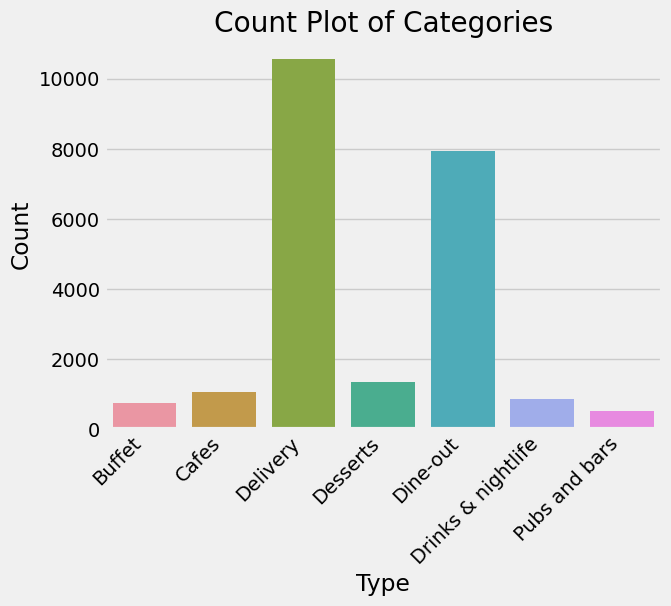

In [92]:
ax = sns.countplot(x=data['type'], data=data)

# Set x-axis labels with rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count Plot of Categories')

# Show plot
plt.show()

In [93]:
data['type'].min()

'Buffet'

# Cost of food for two peoples

In [48]:
from plotly.offline import iplot

In [49]:
# Create a box plot trace
trace0 = go.Box(y=data['cost'], name='accepting online orders', marker=dict(color='rgb(113,10,100)'))

# Define the data and layout
data = [trace0]
layout = go.Layout(title='Box plot of approximate cost', width=800, height=800, yaxis=dict(title='Price'))

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the plot
fig.show()

# Distribution of Charges

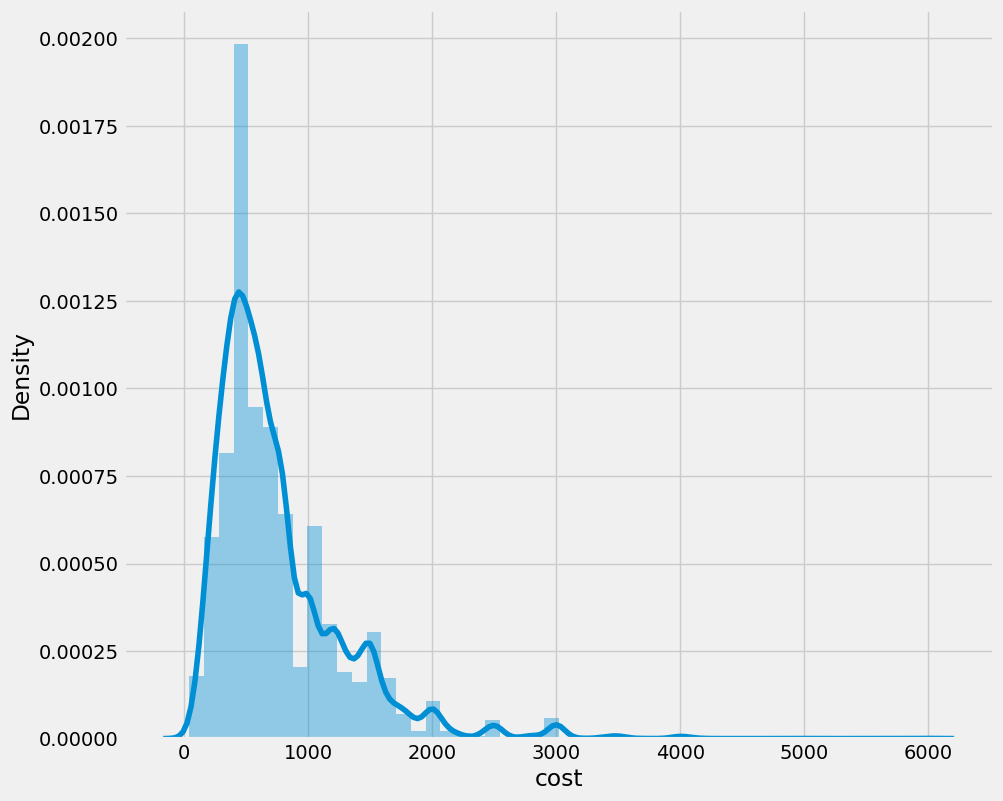

In [94]:
plt.figure(figsize=(10,9))
sns.distplot(data['cost'])
plt.show()

# Most Liked Food 

In [95]:
import re
data.index=range(data.shape[0])
likes=[]
for i in range(data.shape[0]):
    array_split=re.split(',',data['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [96]:
data.index=range(data.shape[0])

In [97]:
data.index

RangeIndex(start=0, stop=23046, step=1)

In [98]:
print('Count of most liked dishes')
fav_food=pd.Series(likes).value_counts()
fav_food.head(30)

Count of most liked dishes


 Pasta              2650
 Pizza              1903
 Cocktails          1863
 Burgers            1724
 Mocktails          1585
 Biryani            1308
 Sandwiches         1281
Burgers             1239
 Coffee             1155
 Nachos             1153
 Fish               1116
 Paratha            1097
 Salads             1038
 Chicken Biryani    1002
Cocktails            891
 Fries               875
 Mutton Biryani      832
 Beer                827
 Noodles             821
 Tea                 800
 Sandwich            784
 Butter Chicken      783
Coffee               782
 Thali               770
Biryani              748
Pizza                736
 Roti                721
 Brownie             712
 Salad               678
 Hot Chocolate       667
Name: count, dtype: int64

# Restaurants and their Counts

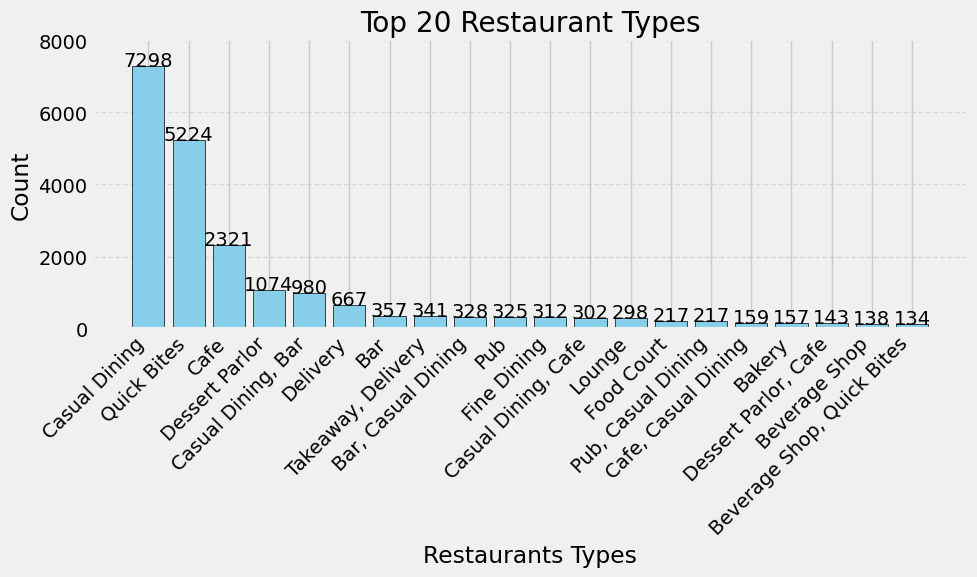

In [99]:
counts = data['rest_type'].value_counts()[:20]

# Create bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')  # Add color and edgecolor to bars

# Add data labels
for i, value in enumerate(counts.values):
    plt.text(i, value + 0.2, str(value), ha='center')  # Add counts above the bars

# Add labels and title
plt.xlabel('Restaurants Types')
plt.ylabel('Count')
plt.title('Top 20 Restaurant Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust y-axis limits for better visualization
plt.ylim(0, counts.max() * 1.1)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

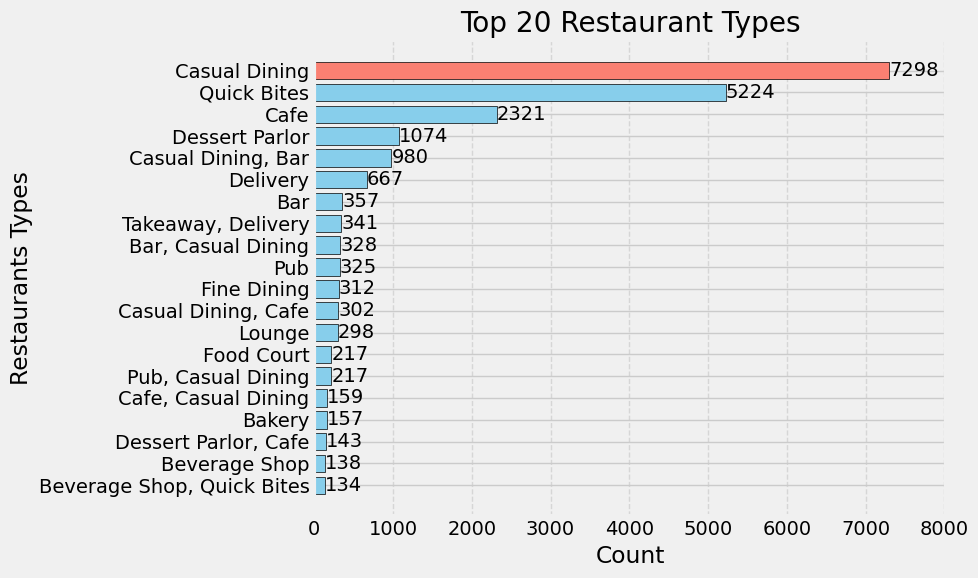

In [100]:
counts = data['rest_type'].value_counts()[:20]

# Reverse the order of counts and names
counts = counts[::-1]

# Create bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Set color for the most used restaurant
colors = ['skyblue'] * len(counts)
colors[-1] = 'salmon'  # Change the color of the last bar to salmon

plt.barh(counts.index, counts.values, color=colors, edgecolor='black')  # Use barh for horizontal bars

# Add data labels
for i, value in enumerate(counts.values):
    plt.text(value, i, str(value), va='center')  # Add counts beside the bars

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Restaurants Types')  # Set y-axis label to the restaurant types
plt.title('Top 20 Restaurant Types')

# Adjust x-axis limits for better visualization
plt.xlim(0, counts.max() * 1.1)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Model Building

In [101]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [102]:
data.online_order[data.online_order=='Yes']=1
data.online_order[data.online_order=='No']=0

In [103]:
data['online_order'].value_counts()

online_order
1    16297
0     6749
Name: count, dtype: int64

In [104]:
data['online_order']=pd.to_numeric(data['online_order'])

In [105]:
data['online_order'].dtype

dtype('int64')

In [106]:
data.book_table[data.book_table=='Yes']=1
data.book_table[data.book_table=='No']=0

In [107]:
data['book_table'].value_counts()

book_table
0    17005
1     6041
Name: count, dtype: int64

In [108]:
data['book_table']=pd.to_numeric(data['book_table'])

In [109]:
data['book_table'].dtype

dtype('int64')

In [110]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to 'location' column and transform it
data['location'] = label_encoder.fit_transform(data['location'])
data['rest_type']=label_encoder.fit_transform(data['rest_type'])
data['cuisines']=label_encoder.fit_transform(data['cuisines'])
data['menu_item']=label_encoder.fit_transform(data['menu_item'])



In [111]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,080 42297555\r\n+91 9743772233,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1382,800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5004,Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,080 41714161,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",592,800,"[('Rated 4.0', 'RATED\n Had been here for din...",5004,Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,+91 9663487993,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",482,800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5004,Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,+91 9620009302,1,62,Masala Dosa,1583,300,"[('Rated 4.0', ""RATED\n Great food and proper...",5004,Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,+91 8026612447\r\n+91 9901210005,4,20,"Panipuri, Gol Gappe",1402,600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5004,Buffet,Banashankari


In [112]:
new_data=data.iloc[:,[3,4,5,6,8,9,11,12,14]]
new_data.to_csv('Zomato_data.csv')

In [113]:
x=data.iloc[:,[3,4,6,8,9,11,12,14]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1382,800,5004
1,1,0,787,1,20,592,800,5004
2,1,0,918,1,16,482,800,5004
3,0,0,88,1,62,1583,300,5004
4,0,0,166,4,20,1402,600,5004


In [114]:
y=data['rate']

In [115]:
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23041    3.8
23042    3.9
23043    2.8
23044    2.5
23045    4.3
Name: rate, Length: 23046, dtype: float64

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

# Liner Regression

In [117]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [118]:
from sklearn.metrics import r2_score
y_pred=model.predict(x_test)
r2_score(y_test,y_pred)

0.23311741929243635

In [119]:
model.score(x_test,y_test)

0.23311741929243635

In [120]:
model.score(x_train,y_train)

0.22590854371752933

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [123]:
model.score(x_train,y_train)

0.9862796592257531

In [124]:
model.score(x_test,y_test)

0.9044753369908229

In [125]:
from sklearn.metrics import r2_score
y_pred=model.predict(x_test)
r2_score(y_test,y_pred)

0.9044753369908229

In [126]:
from sklearn.ensemble import ExtraTreesRegressor

In [127]:
model_1 = ExtraTreesRegressor(n_estimators=100, random_state=42)
model_1.fit(x_train, y_train)

ExtraTreesRegressor(random_state=42)

In [128]:
from sklearn.metrics import r2_score
y_pred=model_1.predict(x_test)
r2_score(y_pred,y_test)

0.924846509289437

Extra Trees Regressor is giving best accuracy

we will use pickle to save our model

In [129]:

 import pickle

# Saving the trained model
pickle.dump(model_1, open('model.pk1', 'wb'))

# Loading the saved model
new_model = pickle.load(open('model.pk1', 'rb'))


Pickle is used to run our machine learning algorithms on web and it also help us to use our model again later without training model again